In [1]:
import sys
sys.path.append('..')

from osmuf.core import *

In [2]:
# dictionary of places of interest for convenience, 
places = {'posadas' : (-27.37577,-55.90059),
          'kaduna' : (10.53364, 7.37360),
          'buenos_aires' : (-34.5798,-58.4422), #57897,44013
          'margery_street' : (51.5266,-0.1109),
          'welwyn_garden_city': (51.7938,-0.18645)}

In [3]:
place='margery_street'
point=places[place]
distance=500 # in meters

In [4]:
city_blocks_net, city_blocks_gross, city_blocks_gross_raw = city_blocks(point, distance)

In [5]:
building_blocks = buildings_by_block(city_blocks_net)

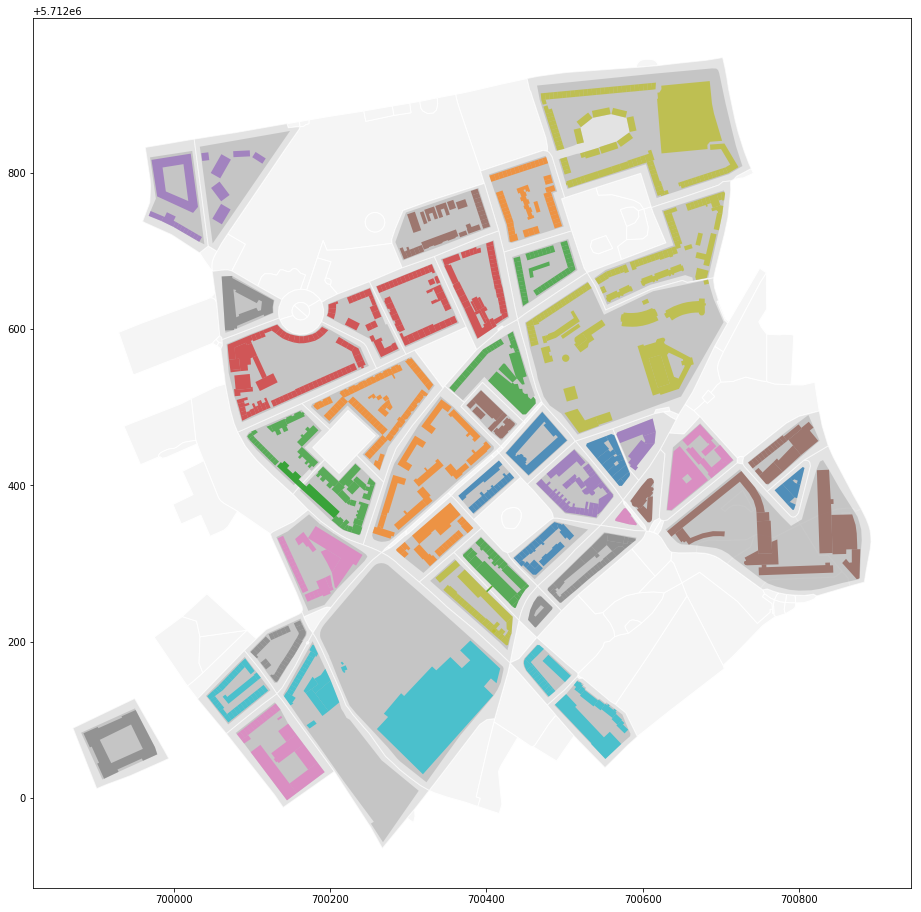

In [6]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,16));

city_blocks_gross.plot(ax=ax, color='lightgray',edgecolor='white', alpha=0.5);

city_blocks_net.plot(ax=ax, color='darkgray', alpha=0.5);

# show the buildings coloured by block
building_blocks.plot(ax=ax, column='block_id', cmap=None, categorical=True, legend=False,alpha=0.7);